In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# 
# plt.figure(figsize=(10, 5.625))
run = 2
# Вариант 8. Гаврилов Никита
k = 1.38*10**-23
T_0 = 17 + 273.15
W = 3*10**6

N_T = k*T_0*W
N_T_dBm = 10*math.log10(N_T/0.001)

deltaP_n_dB = 35

P_n_dBm = N_T_dBm + deltaP_n_dB
print(N_T)
print(f'{N_T_dBm} {P_n_dBm}')


1.2012209999999997e-14
-109.20377083978552 -74.20377083978552


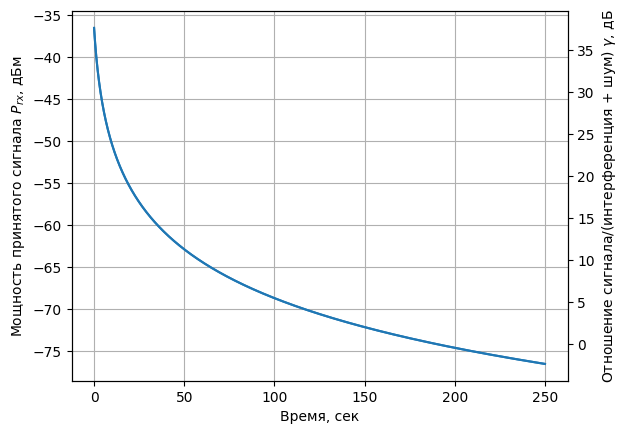

In [9]:
receptionPower = pd.read_csv(f'{run}/receptionPower.csv', sep=',', header=None)
receptionPower_dBm = receptionPower
receptionPower_dBm[1] = 10*np.log10(receptionPower_dBm[1]/0.001)

minSnir = pd.read_csv(f'{run}/minSnir.csv', sep=',', header=None)
minSnir_dB = minSnir
minSnir_dB[1] = 10*np.log10(minSnir[1])


fig, ax1 = plt.subplots()
ax1.set_xlabel('Время, сек')
ax1.set_ylabel('Мощность принятого сигнала $P_{rx}$, дБм')
ax1.plot(receptionPower[0], receptionPower[1])
ax1.tick_params(axis='y')
ax1.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Отношение сигнала/(интерференция + шум) $\gamma$, дБ')
ax2.tick_params(axis='y')
ax2.plot(minSnir_dB[0], minSnir_dB[1])
# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.savefig(f'{run}/plot1.png')
figp = make_subplots(specs=[[{"secondary_y": True}]])
figp.add_trace(
    go.Scatter(x=receptionPower[0], y=receptionPower[1], name="yaxis data"),
    secondary_y=False,
)
figp.add_trace(
    go.Scatter(x=minSnir_dB[0], y=minSnir_dB[1], name="yaxis2 data"),
    secondary_y=True,
)

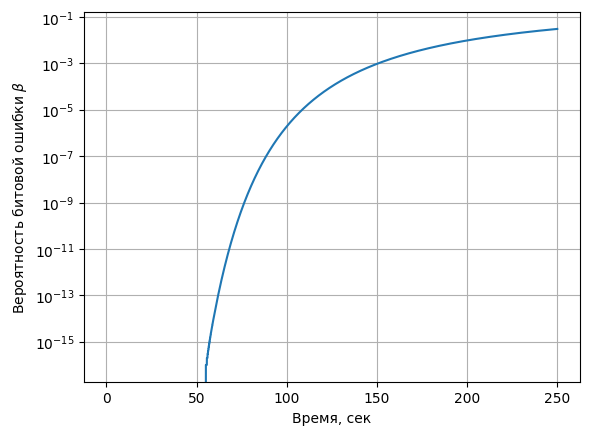

In [3]:
bitErrorRate = pd.read_csv(f'{run}/bitErrorRate.csv', sep=',', header=None)

fig, ax3 = plt.subplots()


ax3.set_xlabel('Время, сек')
ax3.set_ylabel('Вероятность битовой ошибки $\\beta$')
ax3.set_yscale('log')
# ax3.set_ylim([10**-15, 1])
ax3.plot(bitErrorRate[0], bitErrorRate[1])
ax3.grid()
plt.savefig(f'{run}/plot2.png')


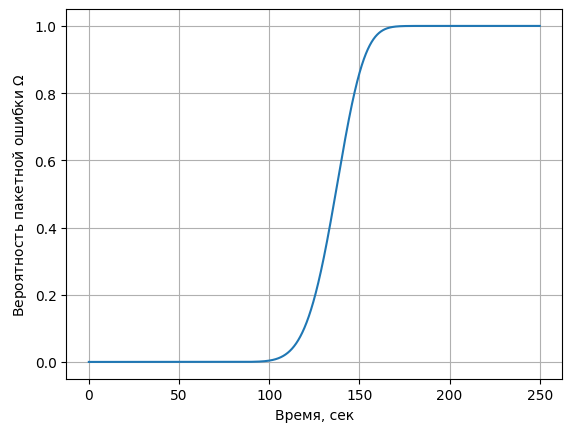

In [4]:
packetErrorRate = pd.read_csv(f'{run}/packetErrorRate.csv', sep=',', header=None)

fig, ax4 = plt.subplots()


ax4.set_xlabel('Время, сек')
ax4.set_ylabel('Вероятность пакетной ошибки $\Omega$')
ax4.plot(packetErrorRate[0], packetErrorRate[1])
ax4.grid()
plt.savefig(f'{run}/plot3.png')


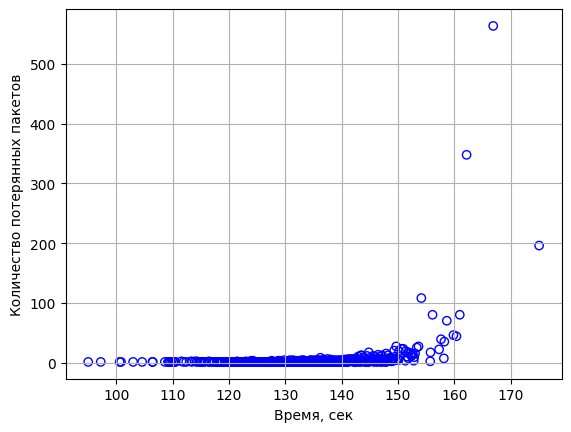

In [5]:
rcvdPkSeqNo = pd.read_csv(f'{run}/rcvdPkSeqNo.csv', sep=',', header=None)

lostPackets = rcvdPkSeqNo
lostPackets[1] = rcvdPkSeqNo[1].shift(-1) - rcvdPkSeqNo[1] - 1
lostPackets = lostPackets.drop(lostPackets[lostPackets[1]==0].index)

fig, ax5 = plt.subplots()

ax5.set_xlabel('Время, сек')
ax5.set_ylabel('Количество потерянных пакетов')
ax5.scatter(lostPackets[0], lostPackets[1], facecolors='none', edgecolors='blue')
# ax5.set_xlim([25, 45])
# ax5.set_ylim([0, 80])
ax5.grid()
plt.savefig(f'{run}/plot4.png')